In [1]:
from google.colab import drive

# montar o drive pra ter acesso a
# arquivos do drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# olá valentim isso é uma nova célula

import pandas as pd

pd.read_csv("/content/drive/MyDrive/py/data/breast_cancer.csv")


,Unnamed: 0,mean_concave_points,mean_perimeter,mean_fractal_dimension,worst_perimeter,worst_texture,worst_area,target
0,0,0.14710,122.80,0.07871,184.60,17.33,2019.0,0
1,1,0.07017,132.90,0.05667,158.80,23.41,1956.0,0
2,2,0.12790,130.00,0.05999,152.50,25.53,1709.0,0
3,3,0.10520,77.58,0.09744,98.87,26.50,567.7,0
4,4,0.10430,135.10,0.05883,152.20,16.67,1575.0,0
...,...,...,...,...,...,...,...,...
564,564,0.13890,142.00,0.05623,166.10,26.40,2027.0,0
565,565,0.09791,131.20,0.05533,155.00,38.25,1731.0,0
566,566,0.05302,108.30,0.05648,126.70,34.12,1124.0,0
567,567,0.15200,140.10,0.07016,184.60,39.42,1821.0,0


**data_modeling**


Em um script ou jupyter notebook explore o dataset fornecido no arquivo breast_cancer.csv de forma a responder as completar o checklist a seguir.
O conjunto de dados "Breast Cancer Wisconsin (Diagnostic)" contém características extraídas dos exames de diagnóstico de câncer de mama, obtidas a partir de imagens digitalizadas das células, e a resposta, se o tumor é maligno ou benigno.
Do total de variáveis, foi feita uma seleção inicial, que levou às colunas

•Pontos côncavos médios: mean concave points;

•Perímetro médio: mean perimeter

•Dimensão fractal média: mean fractal dimension

•Pior perímetro: worst perimeter

•Pior textura: worst texture

•Pior área: worst area

•Tipo: target (1: benigno, 0: maligno).

1 – Investigue a associação de cada uma dessas variáveis com o tipo de tumor via análise exploratória de dados. Comente os resultados obtidos. (sugestão: boxplots, coeficientes de correlação, pairplot...)



In [31]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings


# 1. Importação e Preparação dos Dados
df = pd.read_csv("/content/drive/MyDrive/py/data/breast_cancer.csv")[['mean_concave_points', 'mean_perimeter',
                                         'mean_fractal_dimension', 'worst_perimeter',
                                         'worst_texture', 'worst_area', 'target']]

df['target_fact'] = df['target'].astype('category')
df['target_num'] = df['target'].astype(int)

# 2. Análise Exploratória de Dados
print("\nEstatísticas Descritivas:")
print(df.describe())



Estatísticas Descritivas:
       mean_concave_points  mean_perimeter  mean_fractal_dimension  \
count           569.000000      569.000000              569.000000   
mean              0.048919       91.969033                0.062798   
std               0.038803       24.298981                0.007060   
min               0.000000       43.790000                0.049960   
25%               0.020310       75.170000                0.057700   
50%               0.033500       86.240000                0.061540   
75%               0.074000      104.100000                0.066120   
max               0.201200      188.500000                0.097440   

       worst_perimeter  worst_texture   worst_area      target  target_num  
count       569.000000     569.000000   569.000000  569.000000  569.000000  
mean        107.261213      25.677223   880.583128    0.627417    0.627417  
std          33.602542       6.146258   569.356993    0.483918    0.483918  
min          50.410000      12.020

In [32]:
# Criar df_long com a função melt
df_long = df.melt(id_vars=['target_fact'],
                 value_vars=['mean_concave_points', 'mean_perimeter',
                            'mean_fractal_dimension', 'worst_perimeter',
                            'worst_texture', 'worst_area'],
                 var_name='variavel',
                 value_name='valor')

print(df_long)

     target_fact             variavel       valor
0              0  mean_concave_points     0.14710
1              0  mean_concave_points     0.07017
2              0  mean_concave_points     0.12790
3              0  mean_concave_points     0.10520
4              0  mean_concave_points     0.10430
...          ...                  ...         ...
3409           0           worst_area  2027.00000
3410           0           worst_area  1731.00000
3411           0           worst_area  1124.00000
3412           0           worst_area  1821.00000
3413           1           worst_area   268.60000

[3414 rows x 3 columns]


<Figure size 1400x800 with 0 Axes>

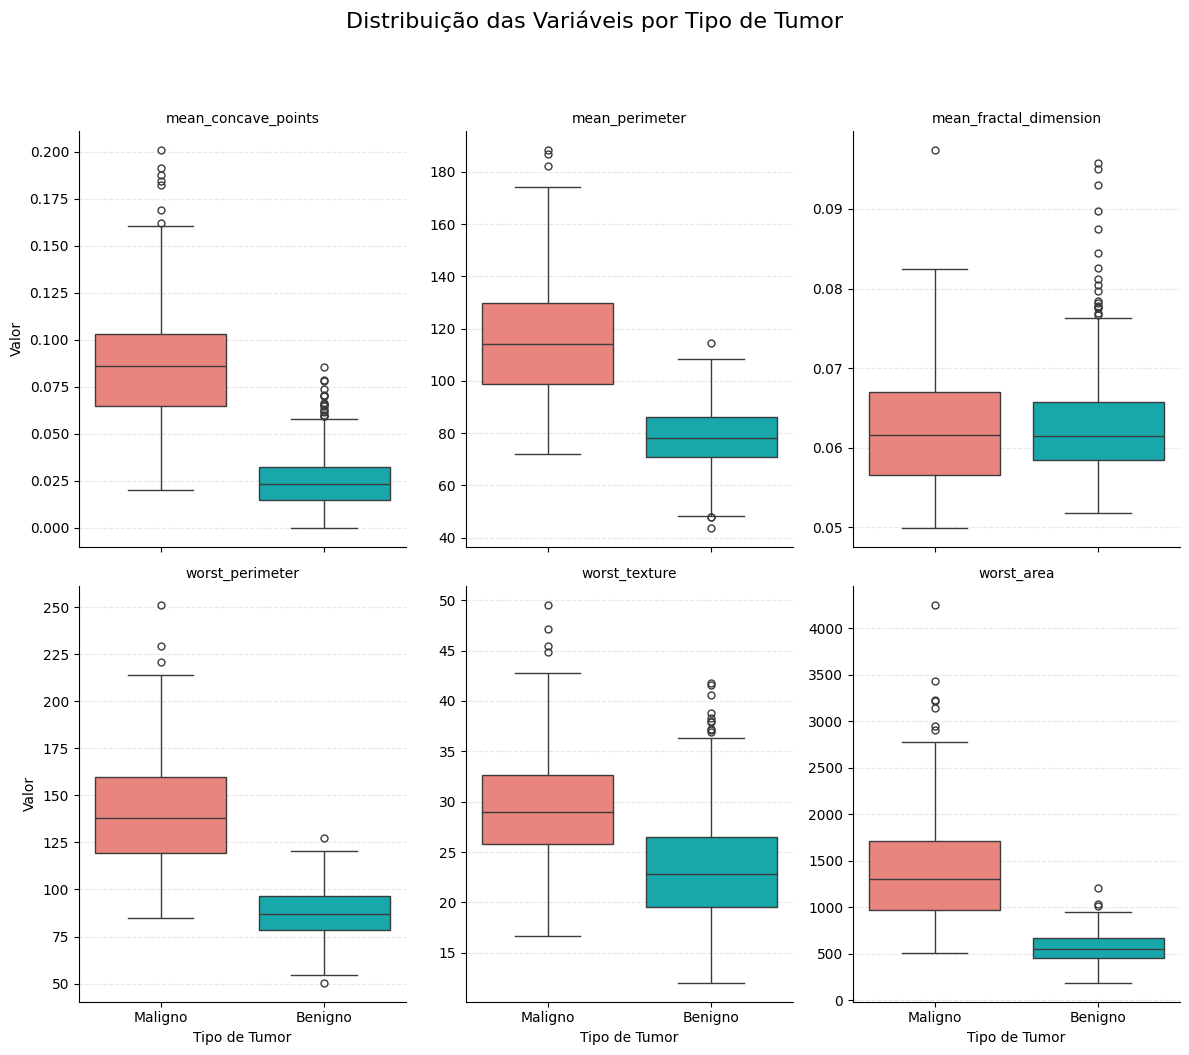

In [33]:
plt.figure(figsize=(14, 8))

# Criar o boxplot facetado por variável
g = sns.catplot(
    x='target_fact',
    y='valor',
    col='variavel',  # Facet por variável
    data=df_long,
    kind='box',
    sharey=False,    # Cada subplot com escala independente
    col_wrap=3,      # 3 colunas de gráficos
    height=5,
    aspect=0.8,
    palette={'0': '#F8766D', '1': '#00BFC4'}
)


g.set_titles("{col_name}")  # Títulos dos facets
g.fig.suptitle('Distribuição das Variáveis por Tipo de Tumor', y=1.05, fontsize=16)
g.set_axis_labels("Tipo de Tumor", "Valor")

# Ajustar os rótulos do eixo X
for ax in g.axes.flat:
    ax.set_xticklabels(['Maligno', 'Benigno'])
    ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


df_melt

In [38]:
df_long


,target_fact,variavel,valor
0,0,mean_concave_points,0.14710
1,0,mean_concave_points,0.07017
2,0,mean_concave_points,0.12790
3,0,mean_concave_points,0.10520
4,0,mean_concave_points,0.10430
...,...,...,...
3409,0,worst_area,2027.00000
3410,0,worst_area,1731.00000
3411,0,worst_area,1124.00000
3412,0,worst_area,1821.00000


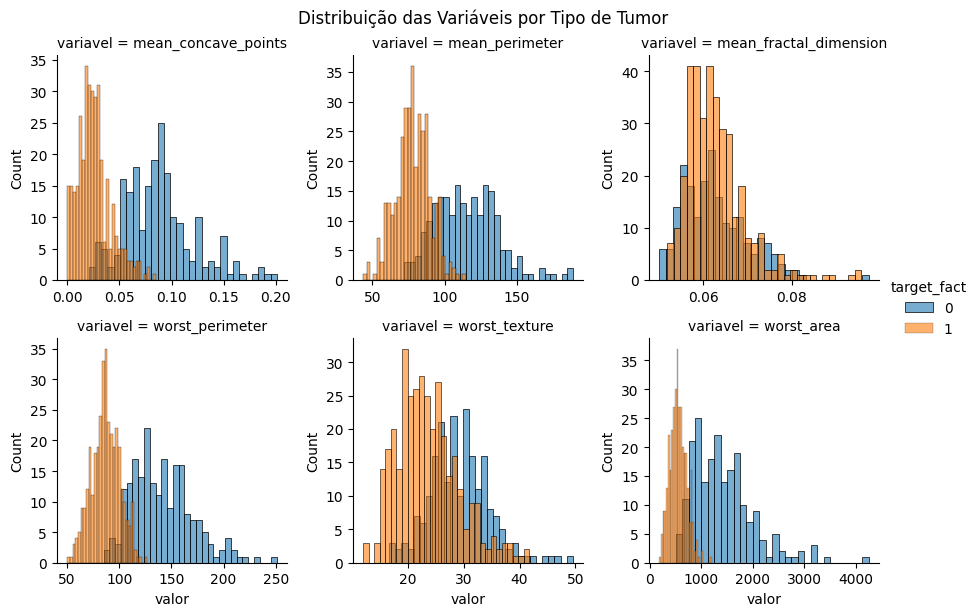

In [41]:
# Histogramas

# g é um objeto, e é um df preparando dados
g = sns.FacetGrid(df_long,
                  col='variavel',
                  hue='target_fact',
                  col_wrap=3,
                  sharex=False, sharey=False)
# Torne o
g.map(sns.histplot,
      'valor',
      #Mude esses aspectos de visuais
      alpha=0.6, bins=30)
# Adicione Legenda no gráfico g
g.add_legend()
# titulo na parte supeiror
plt.suptitle('Distribuição das Variáveis por Tipo de Tumor', y=1.02)
# mostre o gráfico
plt.show()

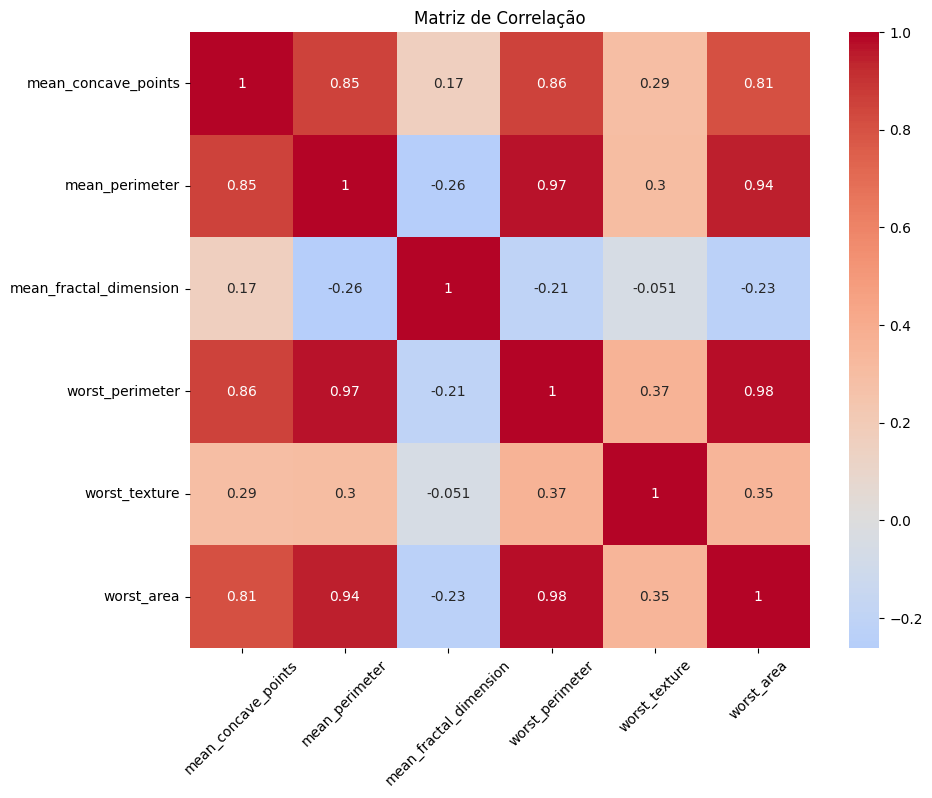

In [42]:

# Matriz de correlação
corr_matrix = df[df.columns[:-3]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.xticks(rotation=45)
plt.show()


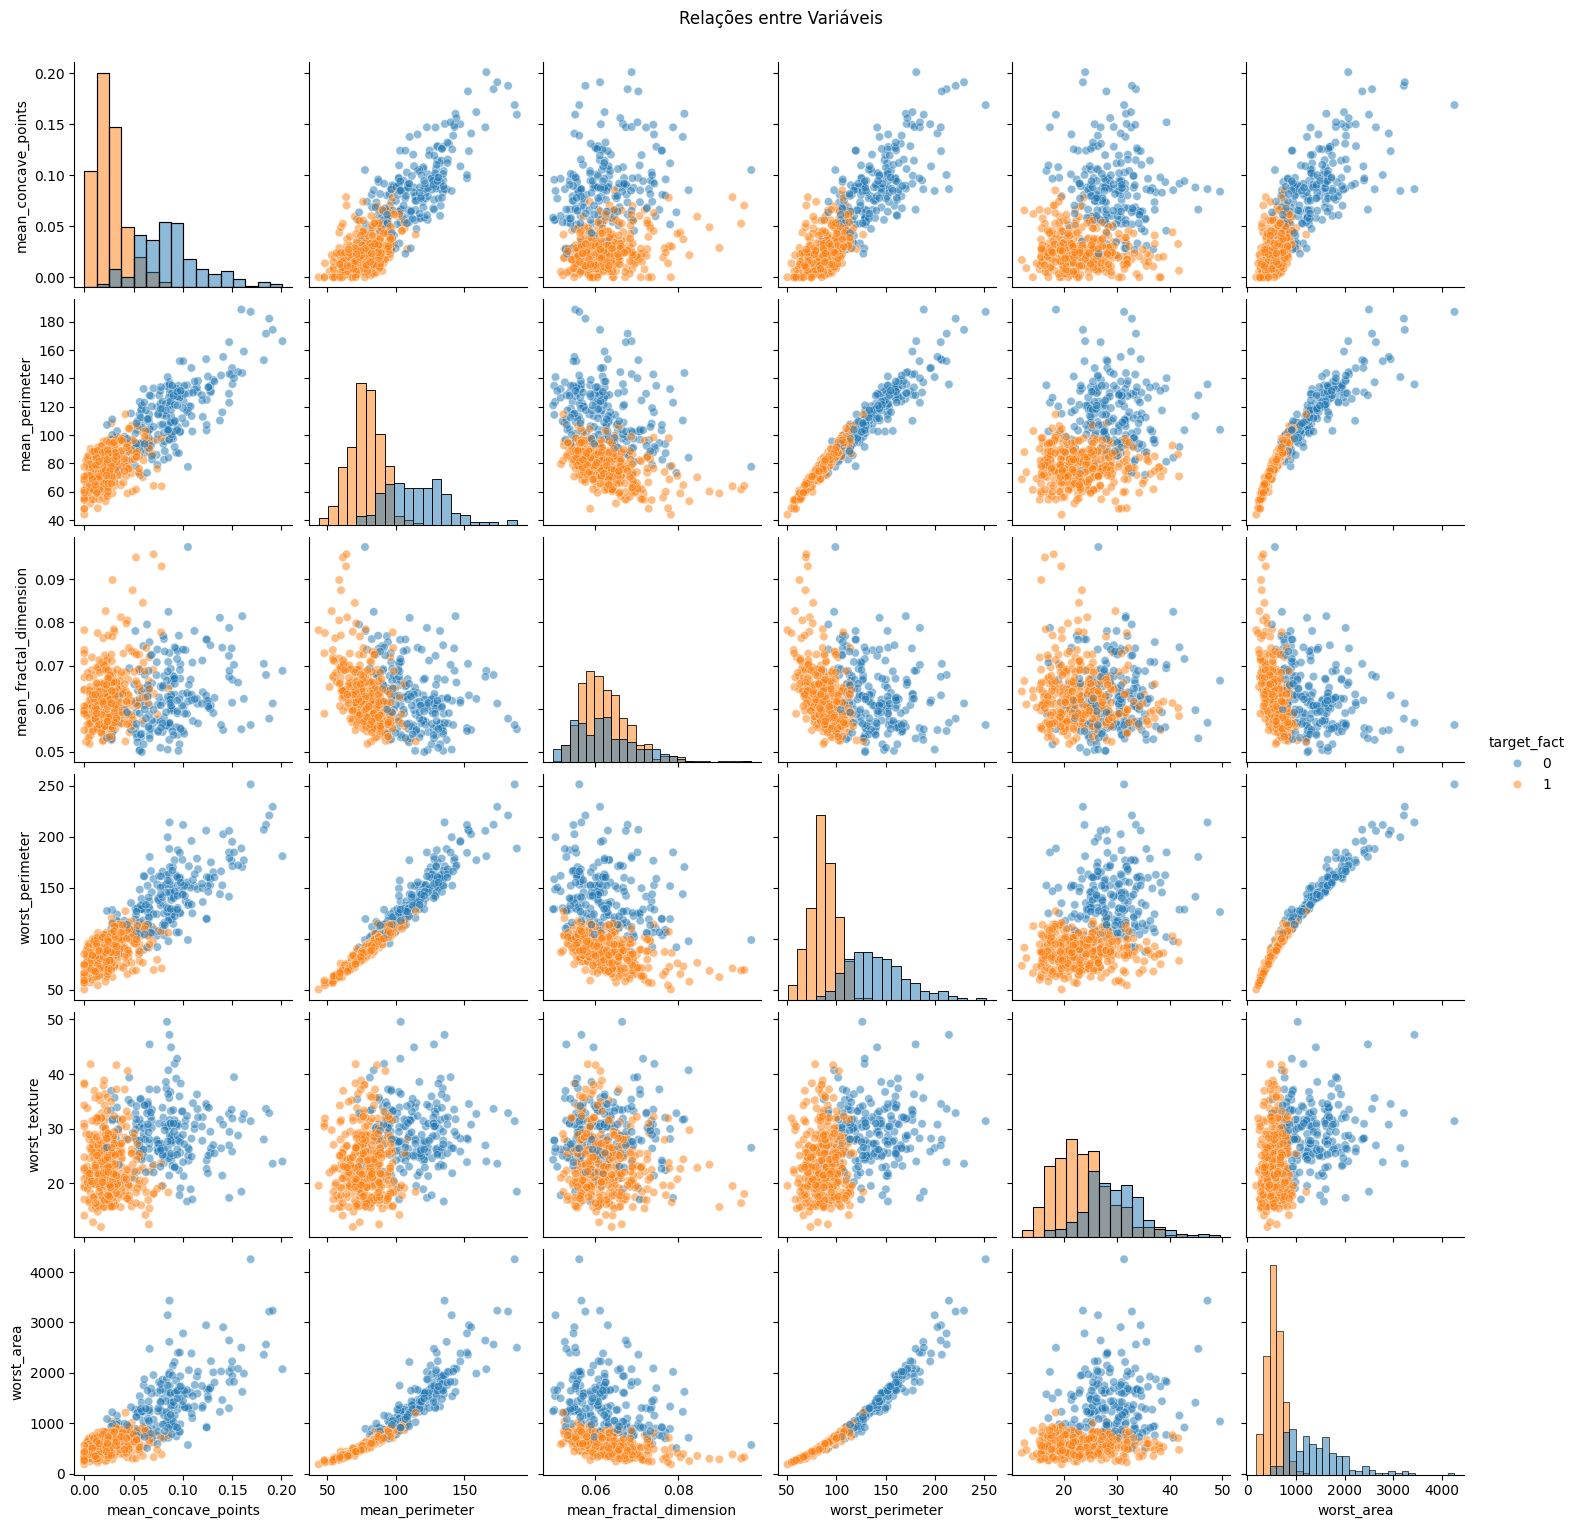

In [43]:

# Pairplot (Gráfico de pares)
sns.pairplot(df, vars=df.columns[:-3], hue='target_fact', diag_kind='hist', plot_kws={'alpha':0.5})
plt.suptitle('Relações entre Variáveis', y=1.02)
plt.show()

2 – Construa uma regressão linear para prever o tipo do tumor, indique as variaveis preditoras e as com significancia marginal neste modelo. Dica, utilize o modulo “OLS” do “statsmodels”. Comente os resultados obtidos.

 import statsmodels as sm
 res = sm.OLS(y, x).fit()
 print(res.summary())


In [50]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import OLS, Logit, add_constant
import statsmodels.api as sm
import warnings
# 3. Regressão Linear
## 3.1 Modelo completo
X = df[['mean_concave_points', 'mean_perimeter', 'mean_fractal_dimension',
        'worst_perimeter', 'worst_texture', 'worst_area']]
y = df['target']  # Usando target diretamente (0/1)
X = sm.add_constant(X)

model_ols = OLS(y, X).fit()
print(model_ols.summary())




                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     226.7
Date:                Tue, 22 Apr 2025   Prob (F-statistic):          1.76e-146
Time:                        19:20:24   Log-Likelihood:                -44.050
No. Observations:                 569   AIC:                             102.1
Df Residuals:                     562   BIC:                             132.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

fator de variância

In [45]:


# Fator de Inflação de Variância (VIF)
vif_data = pd.DataFrame()
vif_data["Variável"] = X.columns[1:]
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(1, len(X.columns))]
print("\nFator de Inflação de Variância (VIF):")
print(vif_data)




Fator de Inflação de Variância (VIF):
                 Variável        VIF
0     mean_concave_points   9.137971
1          mean_perimeter  25.586946
2  mean_fractal_dimension   2.634598
3         worst_perimeter  53.783777
4           worst_texture   1.231785
5              worst_area  24.561019


                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     226.7
Date:                Tue, 22 Apr 2025   Prob (F-statistic):          1.76e-146
Time:                        19:21:56   Log-Likelihood:                -44.050
No. Observations:                 569   AIC:                             102.1
Df Residuals:                     562   BIC:                             132.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

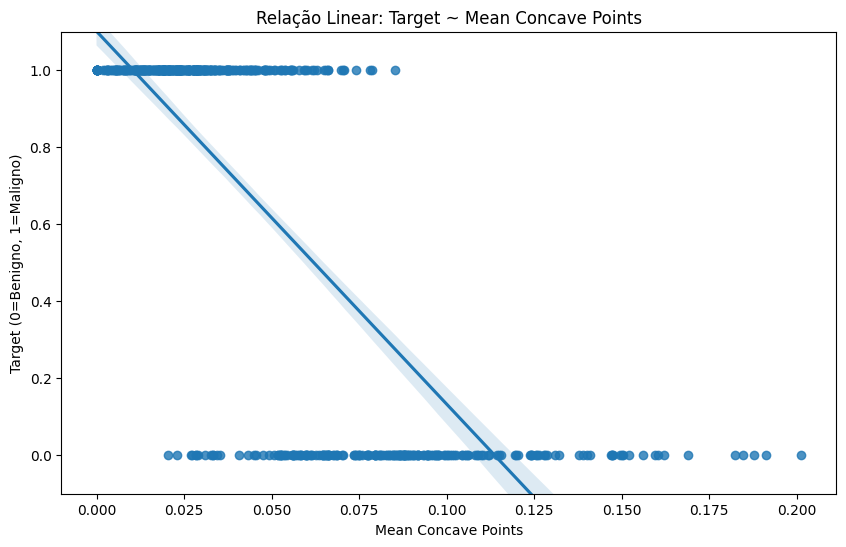

In [51]:
## 3.2 Modelo simples

model_ols_simples = OLS(y, df[['mean_concave_points']]).fit()
print(model_ols.summary())



plt.figure(figsize=(10, 6))
sns.regplot(x='mean_concave_points', y='target', data=df, ci=95)
plt.ylim(-0.1, 1.1)
plt.title('Relação Linear: Target ~ Mean Concave Points')
plt.xlabel('Mean Concave Points')
plt.ylabel('Target (0=Benigno, 1=Maligno)')
plt.show()



In [53]:
## 3.3 Modelo final simplificado
X_final = df[['mean_concave_points', 'worst_perimeter', 'mean_fractal_dimension']]
X_final = sm.add_constant(X_final)
model_final = OLS(y, X_final).fit()
print(model_final.summary())




                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     358.5
Date:                Tue, 22 Apr 2025   Prob (F-statistic):          2.51e-130
Time:                        19:22:30   Log-Likelihood:                -90.593
No. Observations:                 569   AIC:                             189.2
Df Residuals:                     565   BIC:                             206.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

3 – Construa uma regressão logistica para prever o tipo do tumor, indique as variaveis preditoras e as com significancia marginal neste modelo. Dica utilize o modulo “GLM” do “statsmodels” com reposta binomial. Comente os resultados obtidos.

 import statsmodels.api as sm
res = sm.GLM(y, x, family=sm.families.Binomial()).fit()
 print(res.summary())

In [54]:
# 4. Regressão Logística
## 4.1 Modelo completo
X_logit = df[['mean_concave_points', 'mean_perimeter', 'mean_fractal_dimension',
              'worst_perimeter', 'worst_texture', 'worst_area']]
y_logit = df['target']  # Usando target diretamente
X_logit = sm.add_constant(X_logit)

model_logit_full = Logit(y_logit, X_logit).fit()
print(model_logit_full.summary())


Optimization terminated successfully.
         Current function value: 0.070476
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  569
Model:                          Logit   Df Residuals:                      562
Method:                           MLE   Df Model:                            6
Date:                Tue, 22 Apr 2025   Pseudo R-squ.:                  0.8933
Time:                        19:25:16   Log-Likelihood:                -40.101
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                9.904e-142
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3.6754      7.458      0.493      0.622     -10.942     

In [55]:

## 4.2 Modelo simplificado
X_logit_final = df[['mean_concave_points', 'worst_perimeter']]
X_logit_final = sm.add_constant(X_logit_final)
model_logit_final = Logit(y_logit, X_logit_final).fit()
print(model_logit_final.summary())


Optimization terminated successfully.
         Current function value: 0.142766
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  569
Model:                          Logit   Df Residuals:                      566
Method:                           MLE   Df Model:                            2
Date:                Tue, 22 Apr 2025   Pseudo R-squ.:                  0.7838
Time:                        19:25:21   Log-Likelihood:                -81.234
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                1.277e-128
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  18.1655      2.152      8.440      0.000      13.947      22.384
m

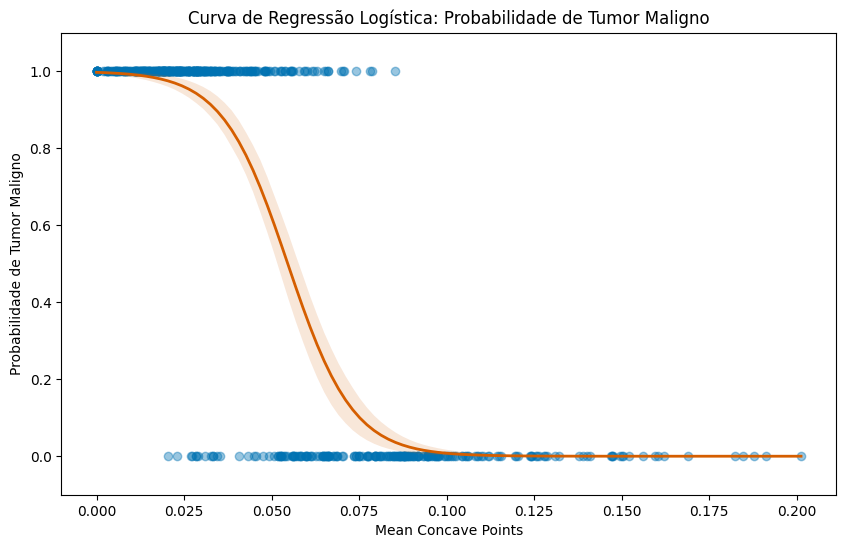

In [56]:

# Curva de Regressão Logística
plt.figure(figsize=(10, 6))
sns.regplot(x='mean_concave_points', y='target', data=df,
            logistic=True, ci=95,
            scatter_kws={'alpha':0.4, 'color':'#0072B2'},
            line_kws={'color':'#D55E00', 'lw':2})
plt.ylim(-0.1, 1.1)
plt.title('Curva de Regressão Logística: Probabilidade de Tumor Maligno')
plt.xlabel('Mean Concave Points')
plt.ylabel('Probabilidade de Tumor Maligno')
plt.show()


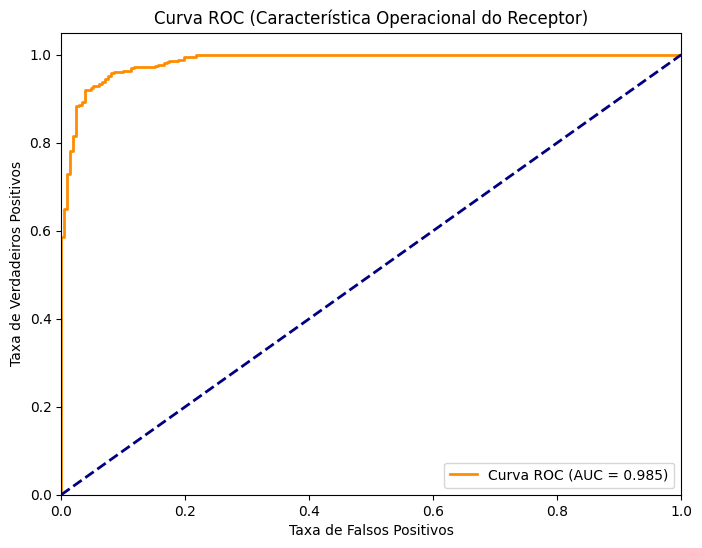

In [59]:

# Curva ROC
y_pred_prob = model_logit_final.predict(X_logit_final)
fpr, tpr, _ = roc_curve(y_logit, y_pred_prob)
auc_score = roc_auc_score(y_logit, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'Curva ROC (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC (Característica Operacional do Receptor)')
plt.legend(loc="lower right")
plt.show()

In [60]:
# 5. Comparação de Modelos
results = pd.DataFrame({
    'Modelo': ['Linear Completo', 'Linear Simplificado', 'Logístico Completo', 'Logístico Simplificado'],
    'Variáveis': [6, 3, 6, 2],
    'R2_AIC': [model_ols.rsquared_adj, model_final.rsquared_adj,
               model_logit_full.aic, model_logit_final.aic],
    'AUC': [np.nan, np.nan,
            roc_auc_score(y_logit, model_logit_full.predict(X_logit)),
            auc_score]
})

print("\nComparação de Modelos:")
print(results)


Comparação de Modelos:
                   Modelo  Variáveis      R2_AIC       AUC
0         Linear Completo          6    0.704470       NaN
1     Linear Simplificado          3    0.653792       NaN
2      Logístico Completo          6   94.202238  0.994570
3  Logístico Simplificado          2  168.467857  0.985479
